In [3]:
import pandas as pd
heart = pd.read_csv('data/HeartDiseaseTrain-Test.csv')
print(heart.head())


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

# Initial Data Check

In [6]:
# Shape and structure
print(f"Shape: {heart.shape}")
print("\nData types and null summary:")
print(heart.info())

Shape: (1025, 14)

Data types and null summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  

In [8]:
# Preview summary stats
print(heart.describe().T)

                         count        mean        std    min    25%    50%  \
age                     1025.0   54.434146   9.072290   29.0   48.0   56.0   
resting_blood_pressure  1025.0  131.611707  17.516718   94.0  120.0  130.0   
cholestoral             1025.0  246.000000  51.592510  126.0  211.0  240.0   
Max_heart_rate          1025.0  149.114146  23.005724   71.0  132.0  152.0   
oldpeak                 1025.0    1.071512   1.175053    0.0    0.0    0.8   
target                  1025.0    0.513171   0.500070    0.0    0.0    1.0   

                          75%    max  
age                      61.0   77.0  
resting_blood_pressure  140.0  200.0  
cholestoral             275.0  564.0  
Max_heart_rate          166.0  202.0  
oldpeak                   1.8    6.2  
target                    1.0    1.0  


# Missing Value Analysis

In [9]:
print("\nMissing values per column:")
print(heart.isnull().sum())


Missing values per column:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


# Data Type Categorization

In [12]:
# Identify numerical and categorical columns
num_cols = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak'
]
cat_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia',
    'target' 
]



# Data Distribution Visualization

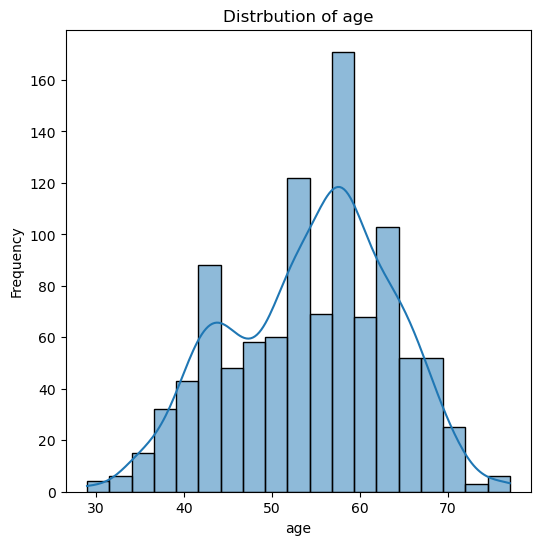

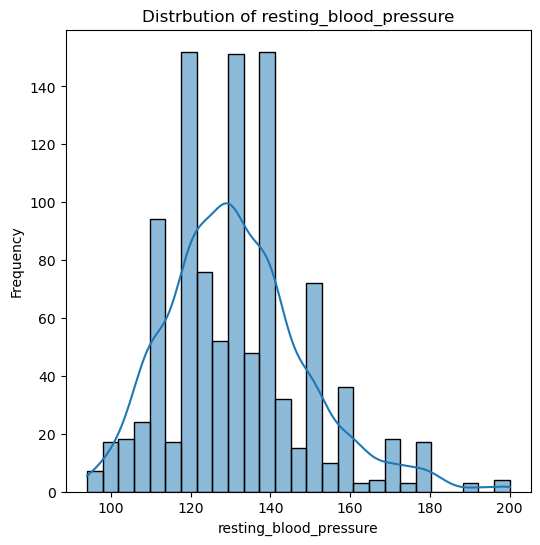

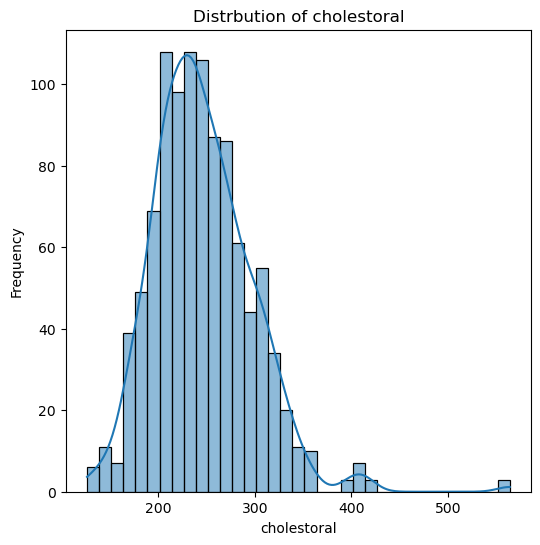

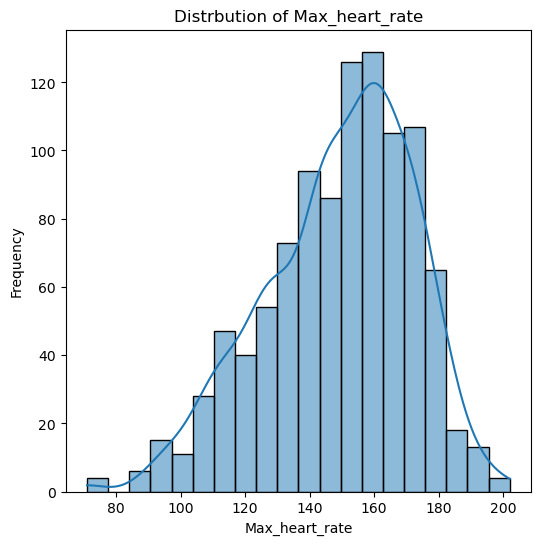

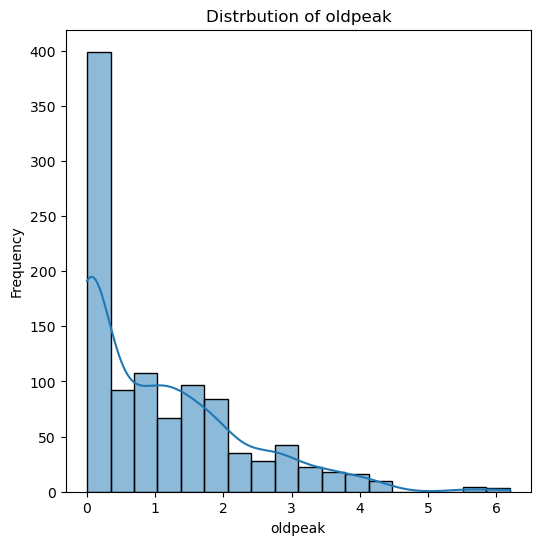

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE for all numerical columns
for col in num_cols:
    plt.figure(figsize=(6,6))
    sns.histplot(heart[col], kde=True)
    plt.title(f"Distrbution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Outlier Detection

Cholesterol outliers (Z > 3): 13


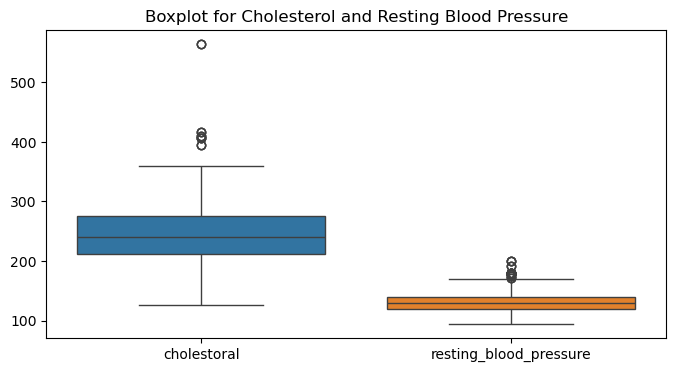

In [15]:
from scipy.stats import zscore

# Z-score method for normally distributed features  
heart['chol_z'] = zscore(heart['cholestoral'])

# Detect outliers in cholesterol
chol_outliers = heart[heart['chol_z'].abs() > 3]
print(f"Cholesterol outliers (Z > 3): {len(chol_outliers)}")

# Boxplots for cholestoral and resting_blood_pressure
plt.figure(figsize=(8, 4))
sns.boxplot(data=heart[['cholestoral', 'resting_blood_pressure']])
plt.title('Boxplot for Cholesterol and Resting Blood Pressure')
plt.show()

# Correlation Analysis

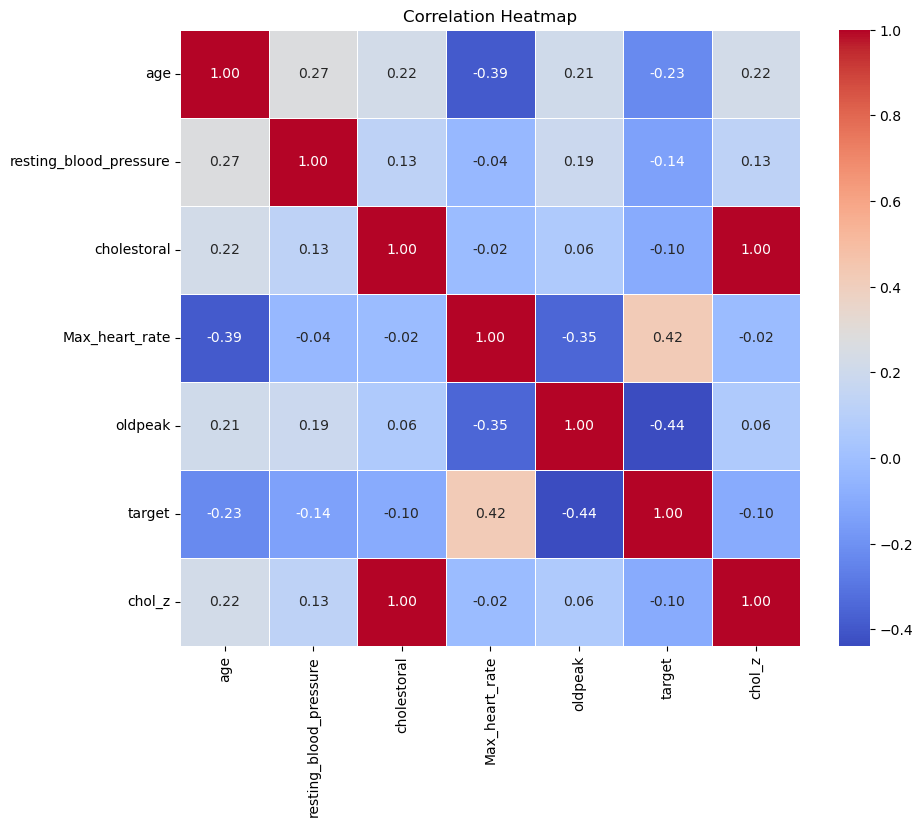

In [19]:
numerical_heart = heart.select_dtypes(include=['number'])

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_heart.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Categorical Variable Distribution (Univariate)

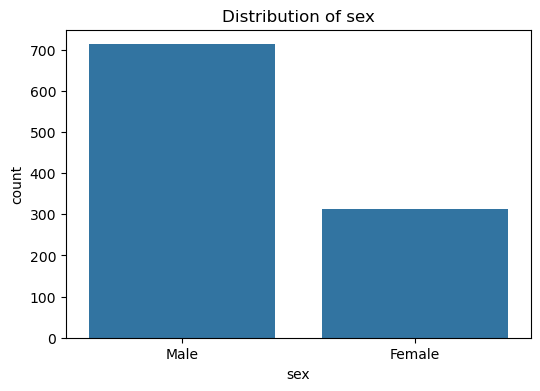

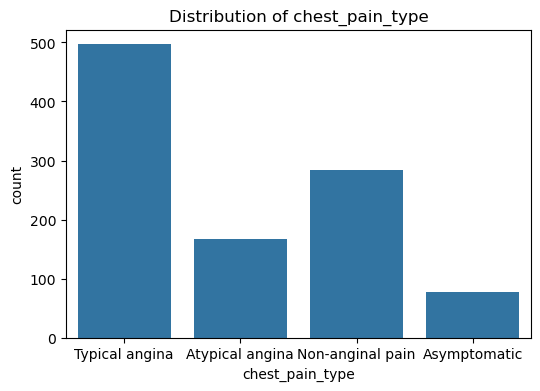

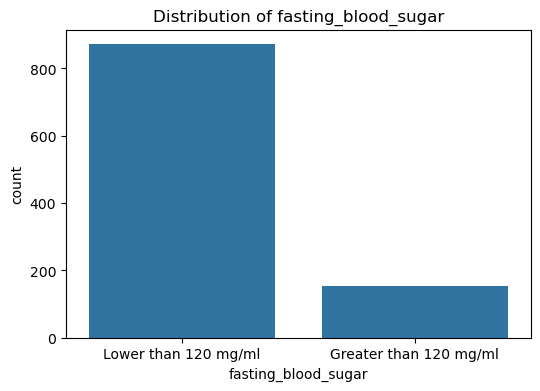

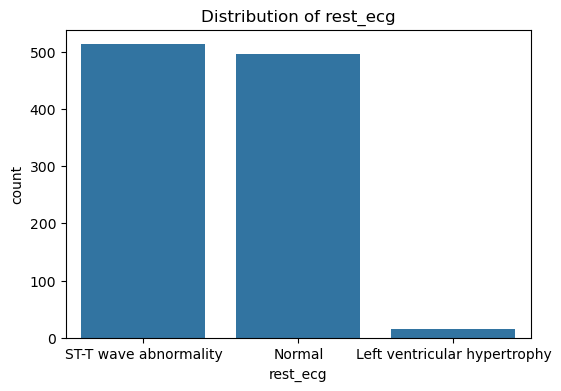

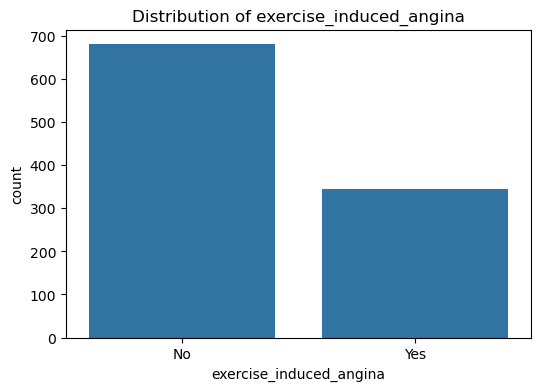

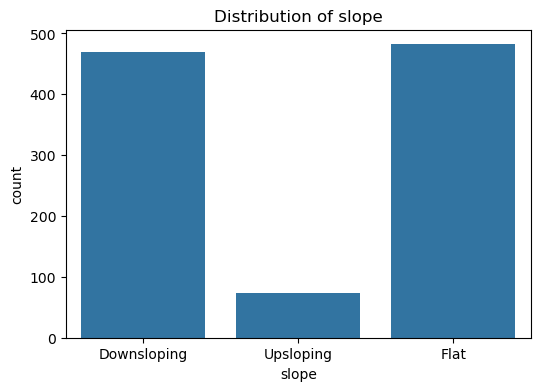

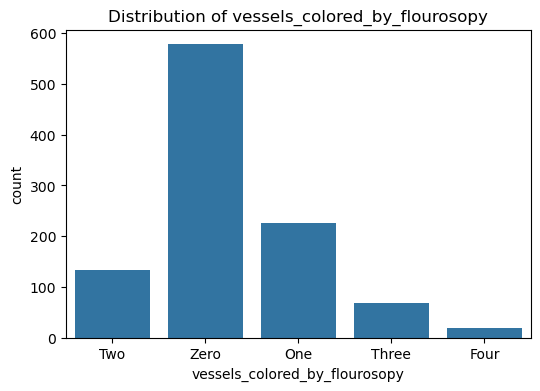

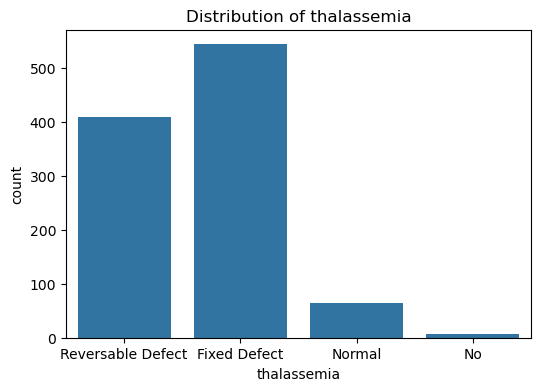

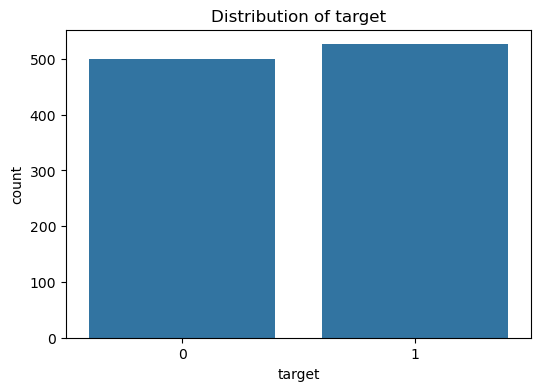

In [20]:
# Count plots for categorical variables
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=heart)
    plt.title(f'Distribution of {col}')
    plt.show()


# Relationship Exploration (Categorical vs Numerical)

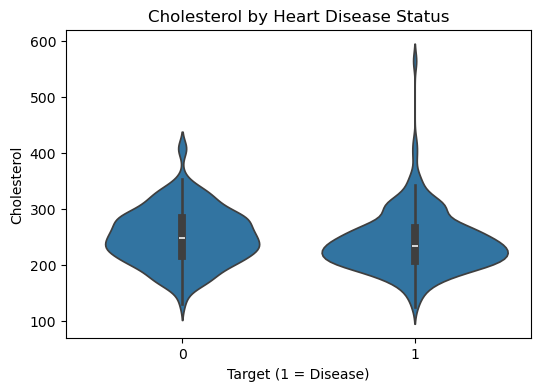

In [23]:
# Violin plot: Cholesterol by Heart Disease (target)
plt.figure(figsize=(6, 4))
sns.violinplot(x='target', y='cholestoral', data=heart)
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Target (1 = Disease)')
plt.ylabel('Cholesterol')
plt.show()

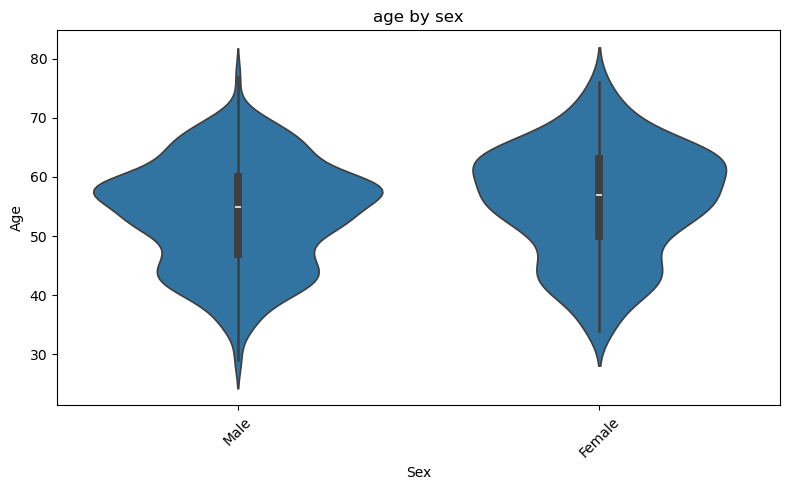

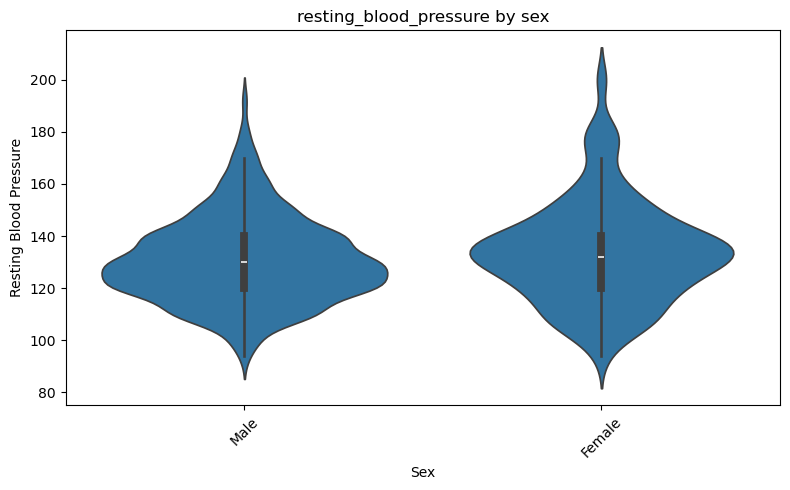

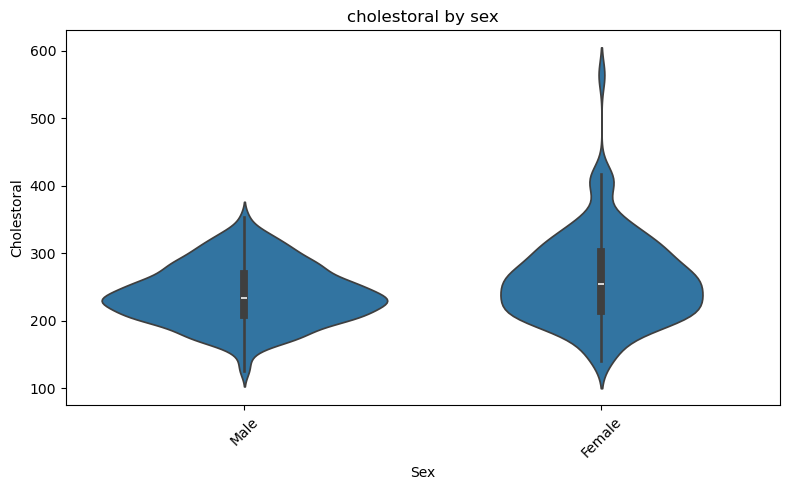

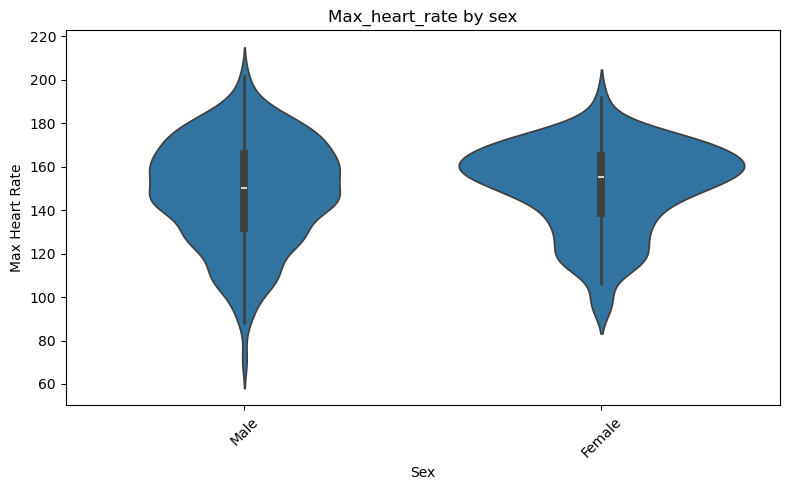

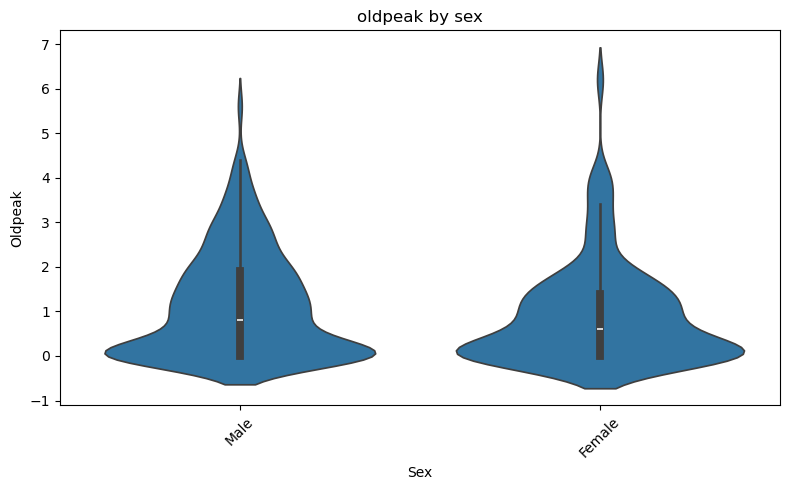

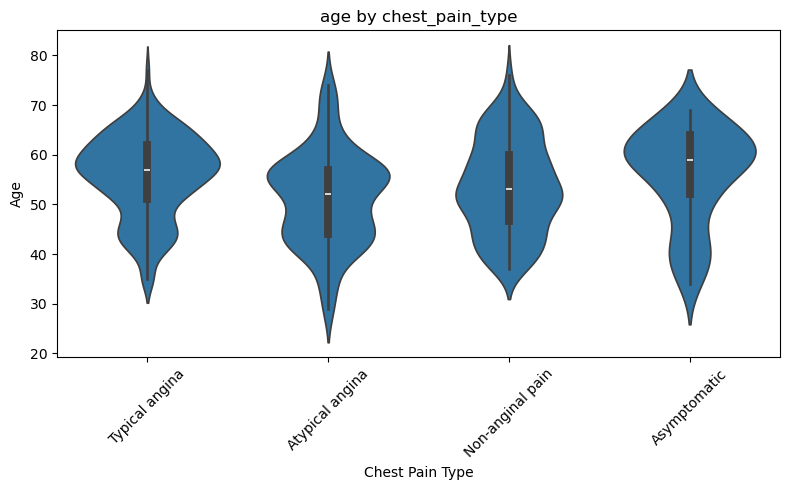

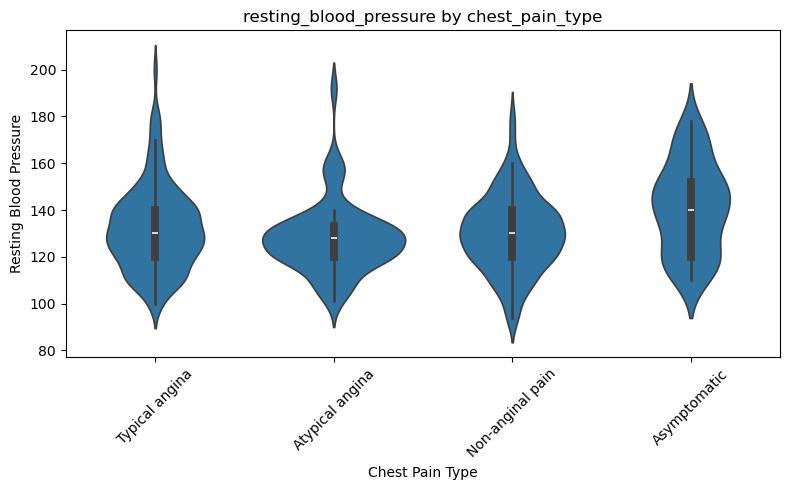

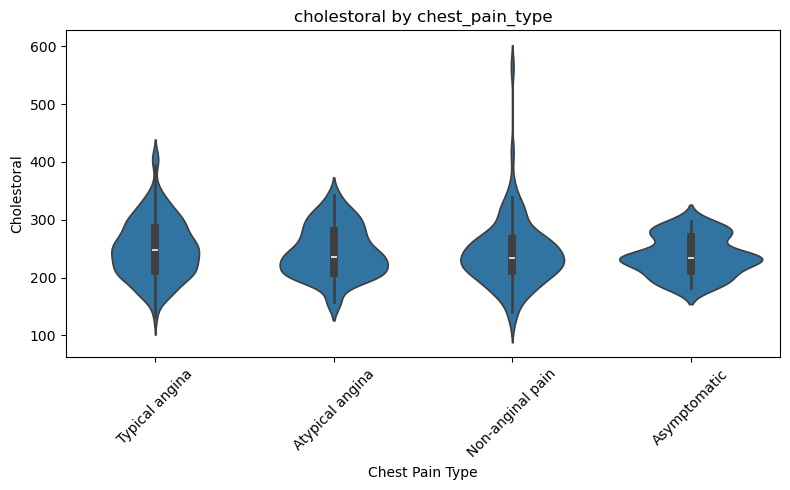

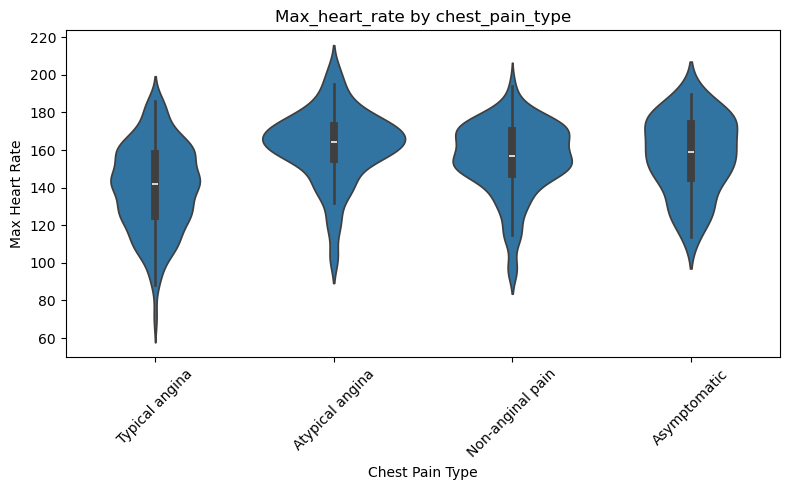

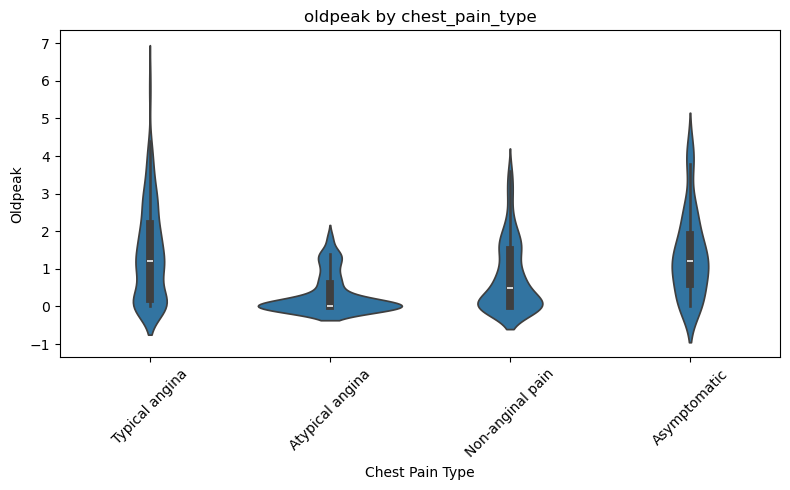

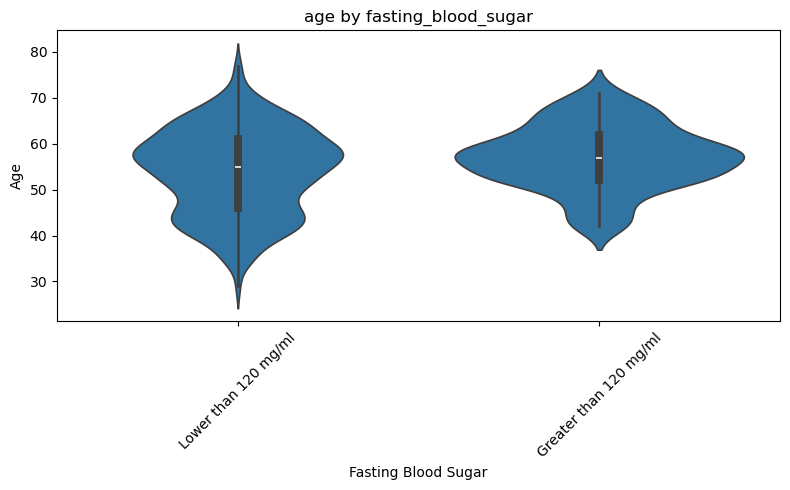

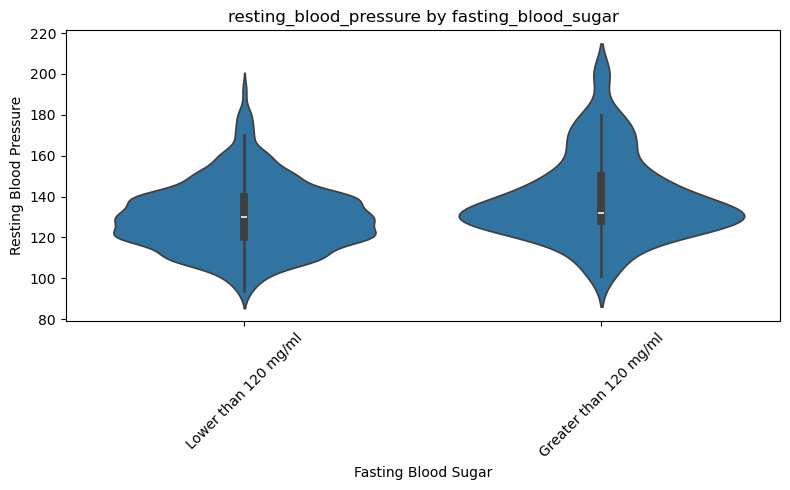

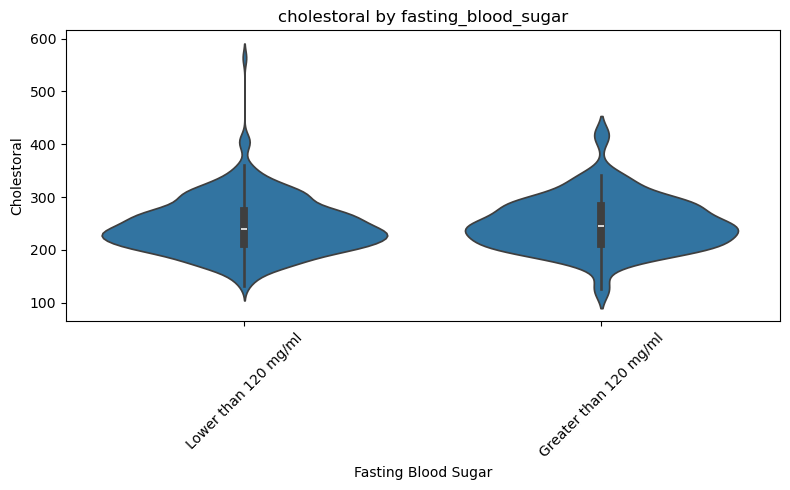

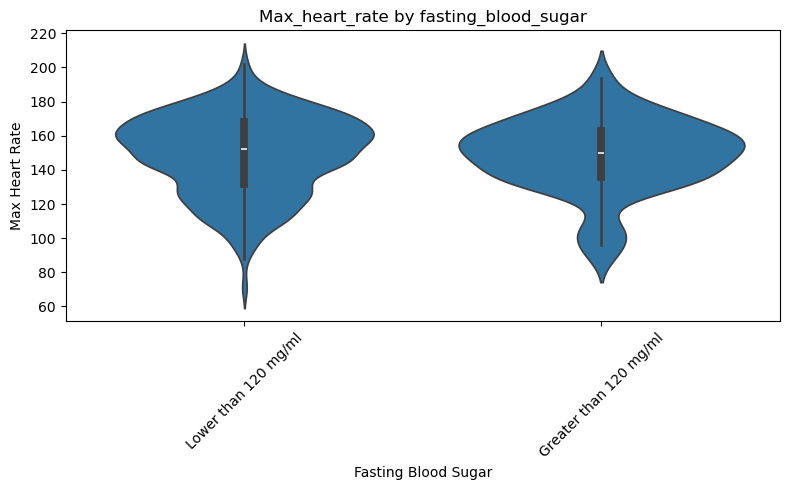

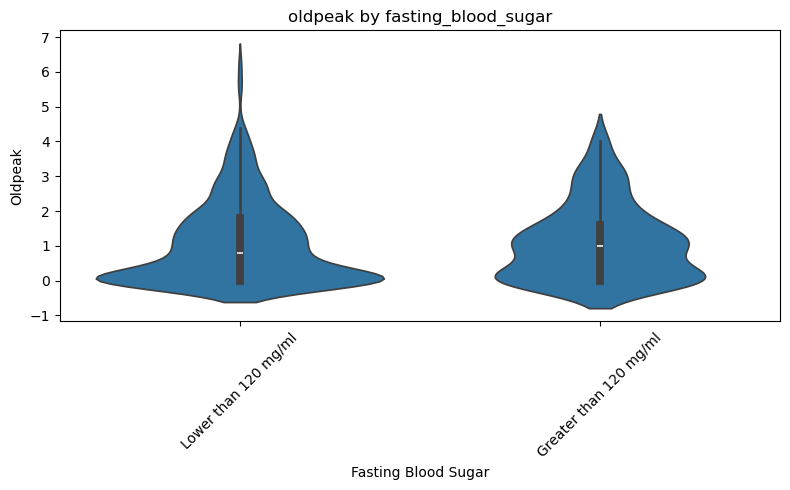

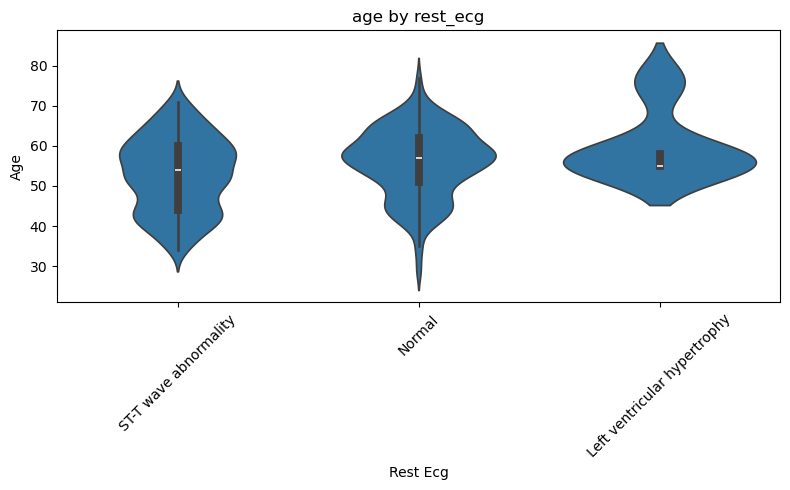

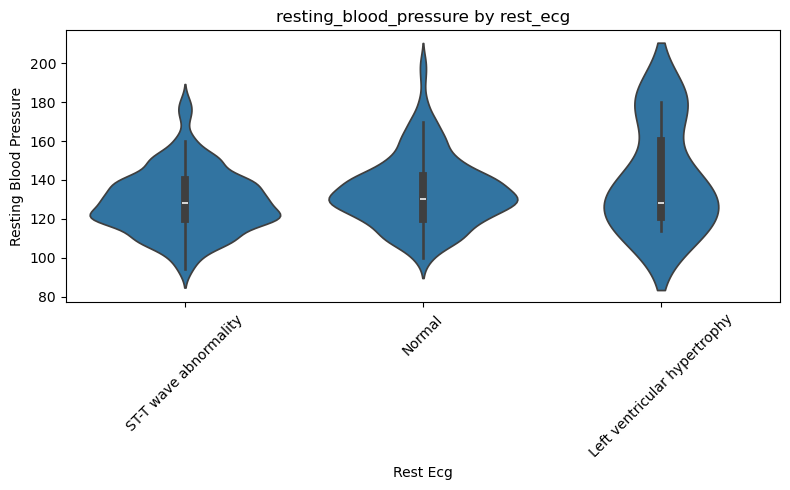

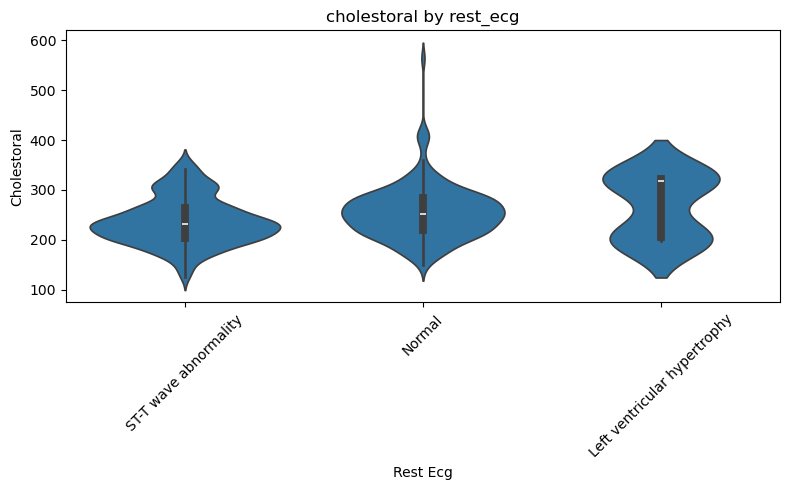

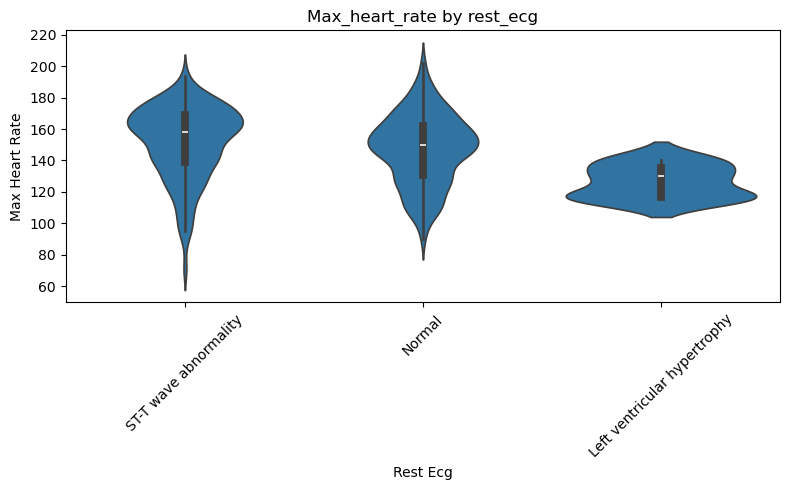

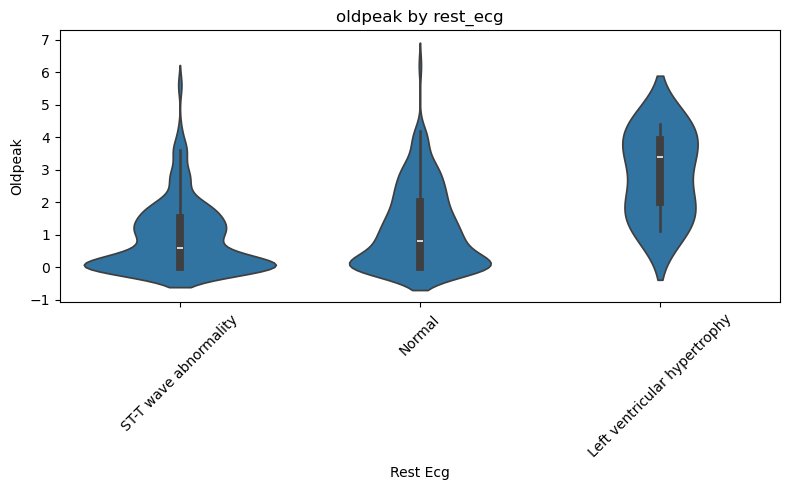

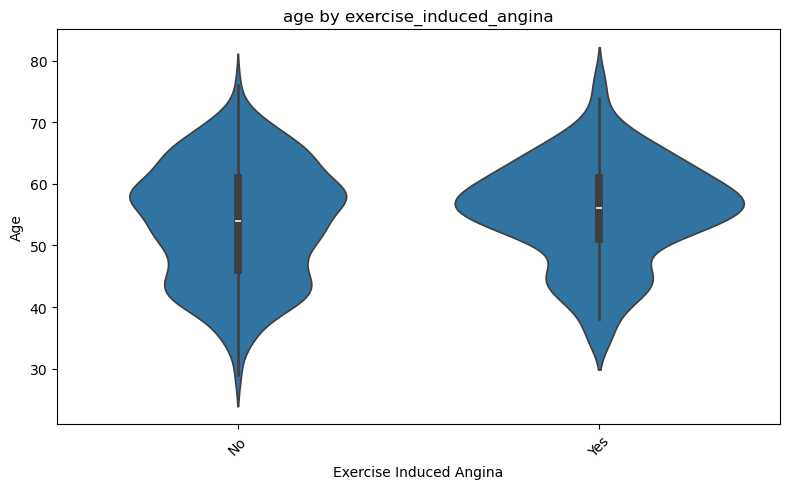

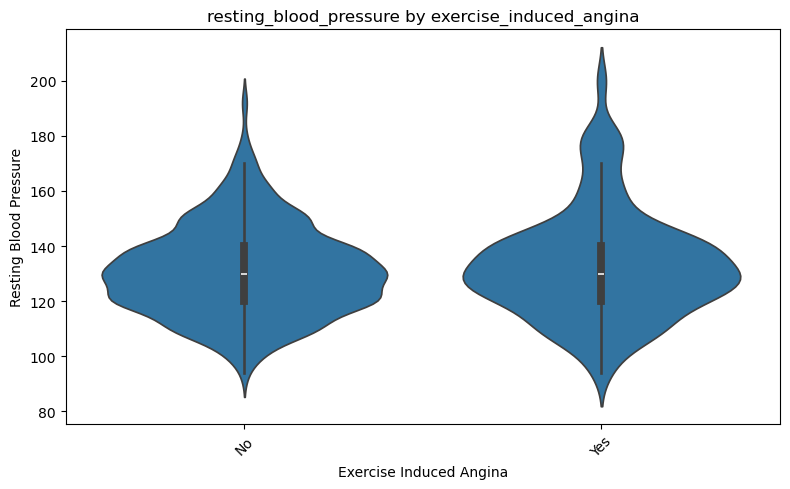

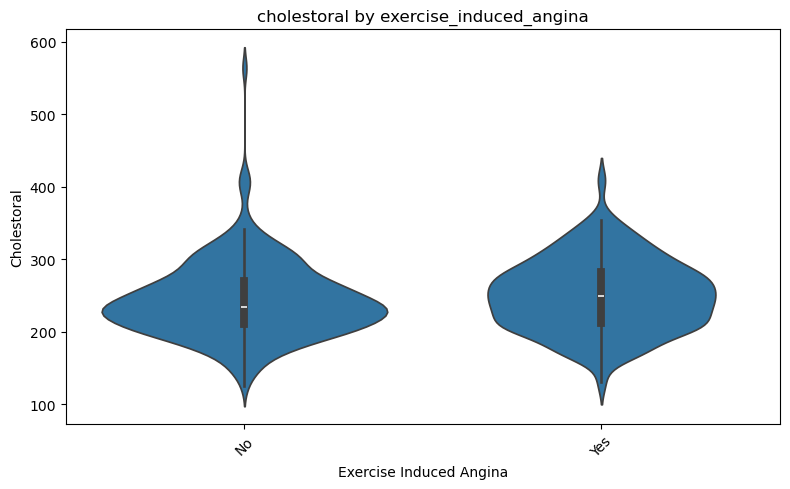

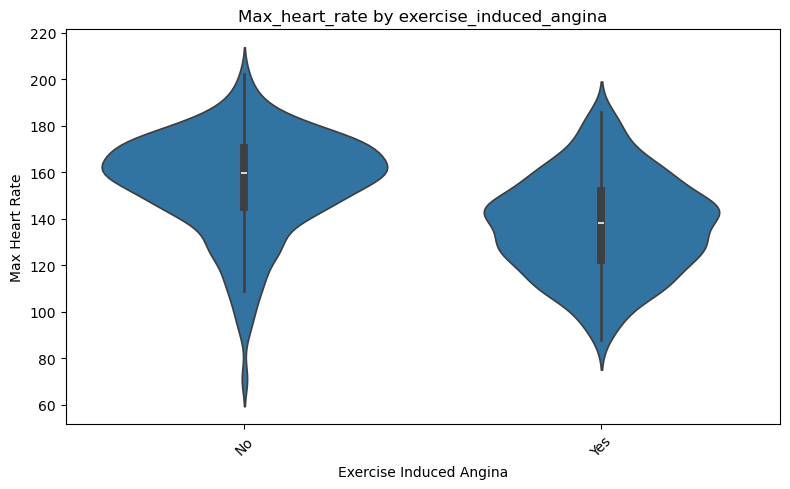

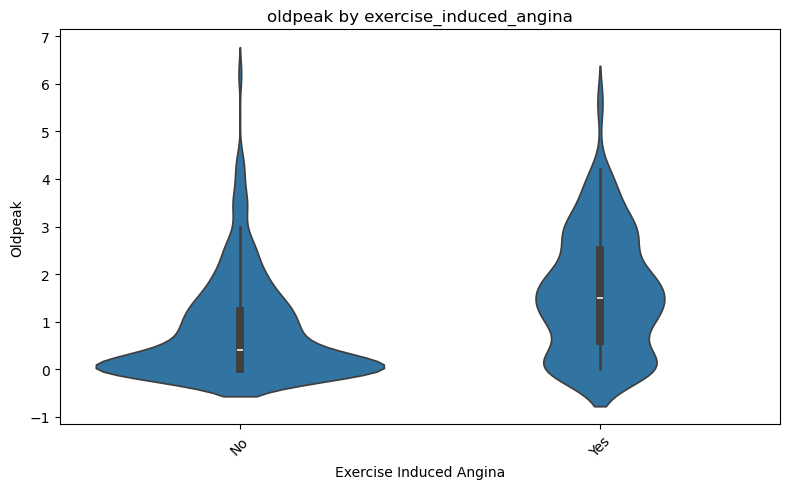

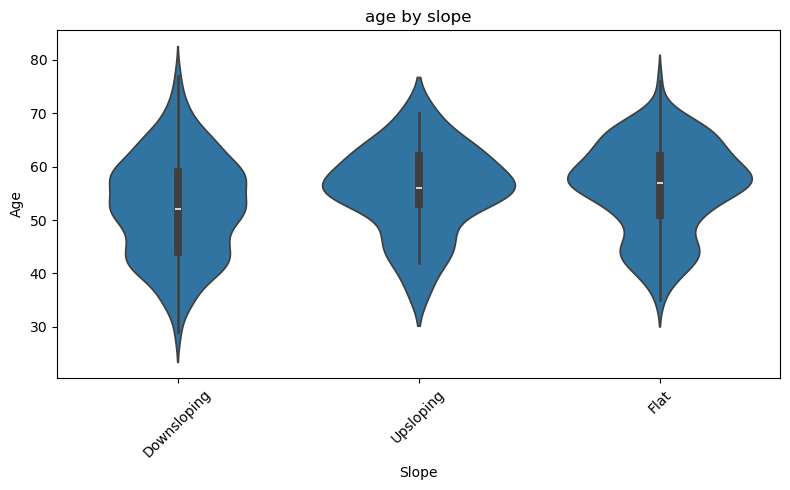

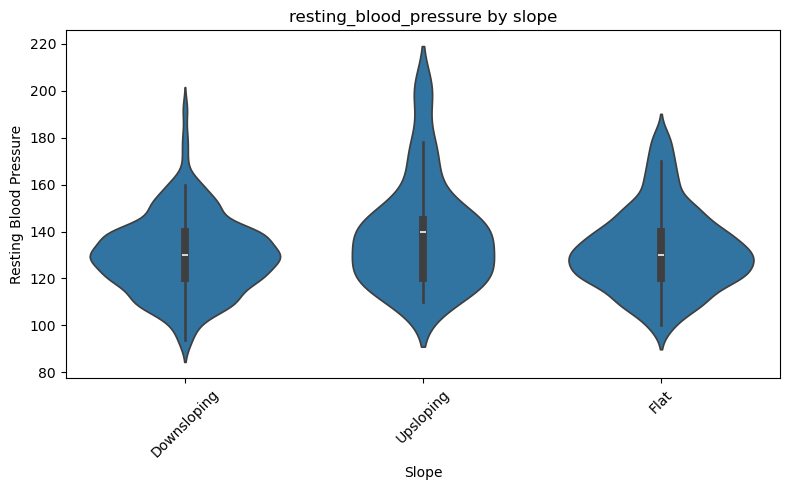

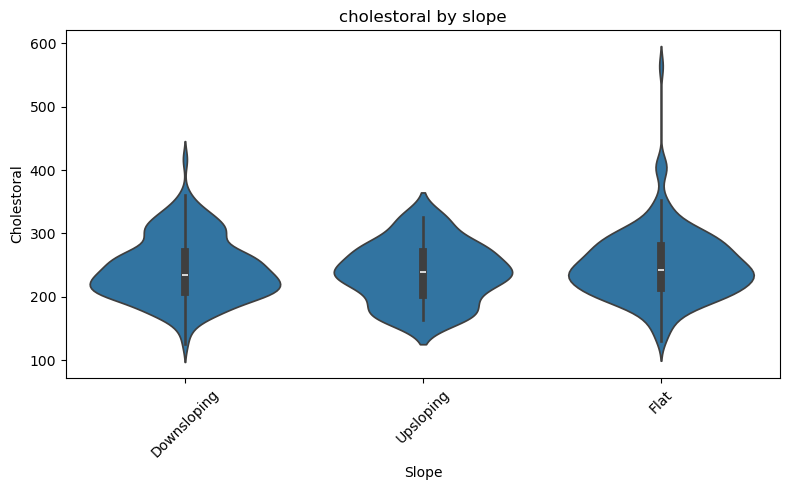

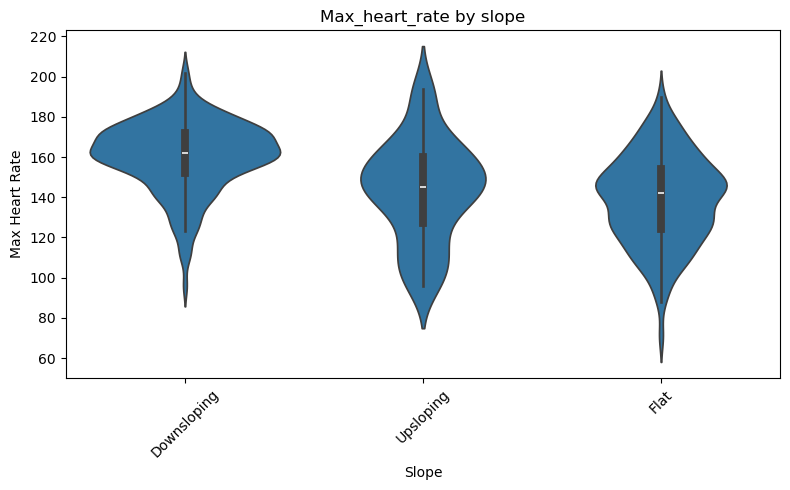

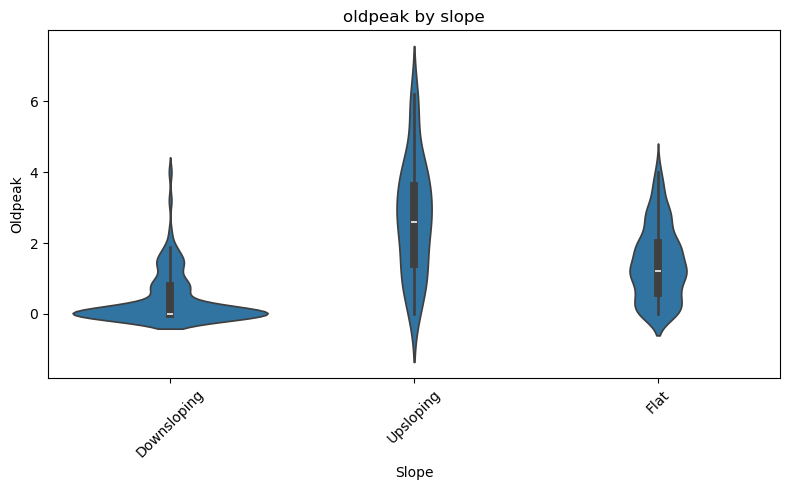

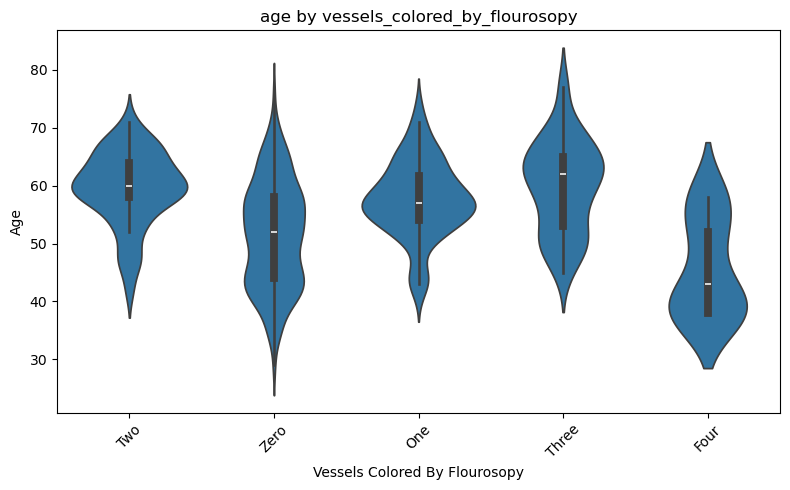

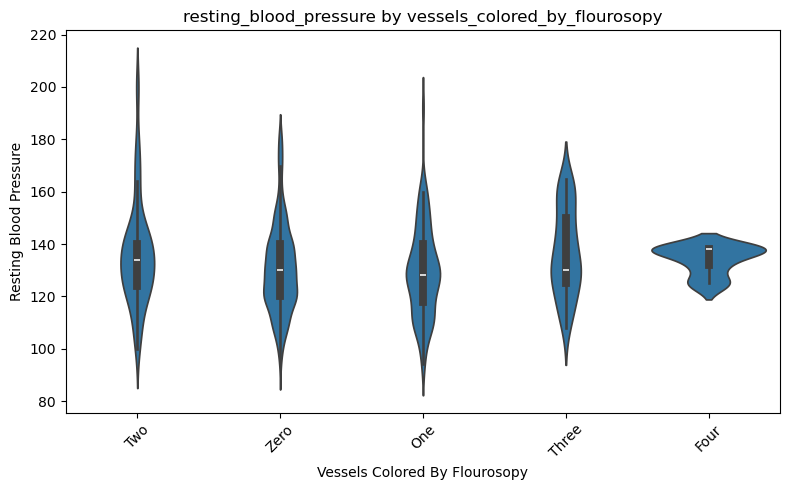

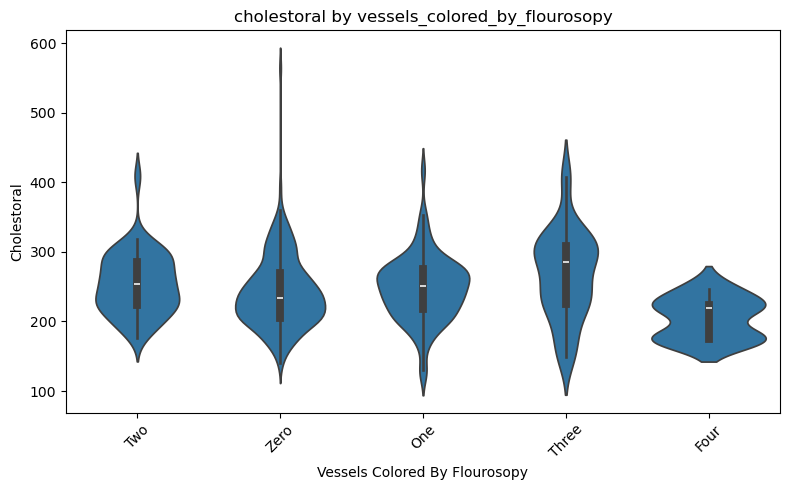

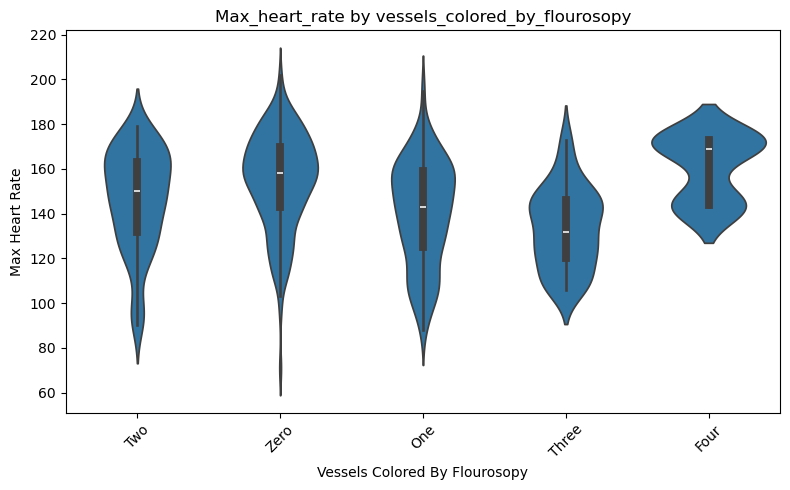

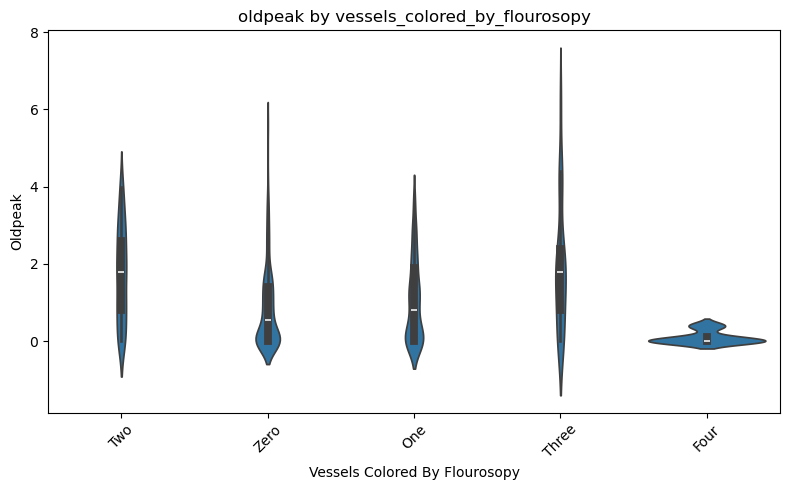

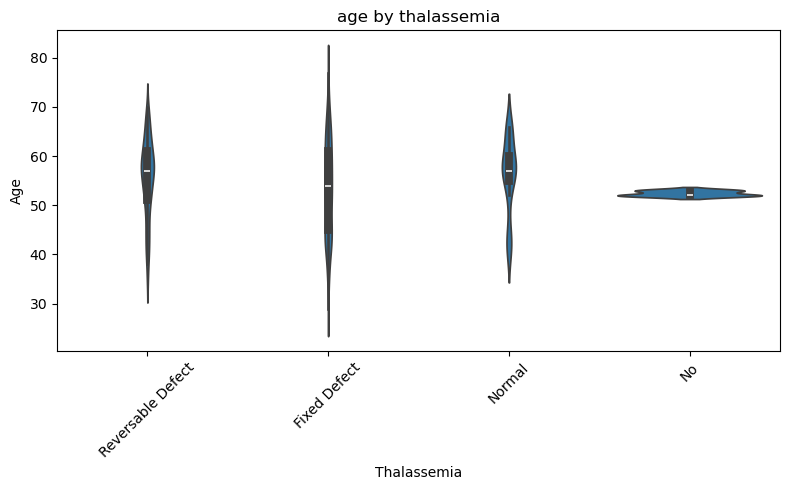

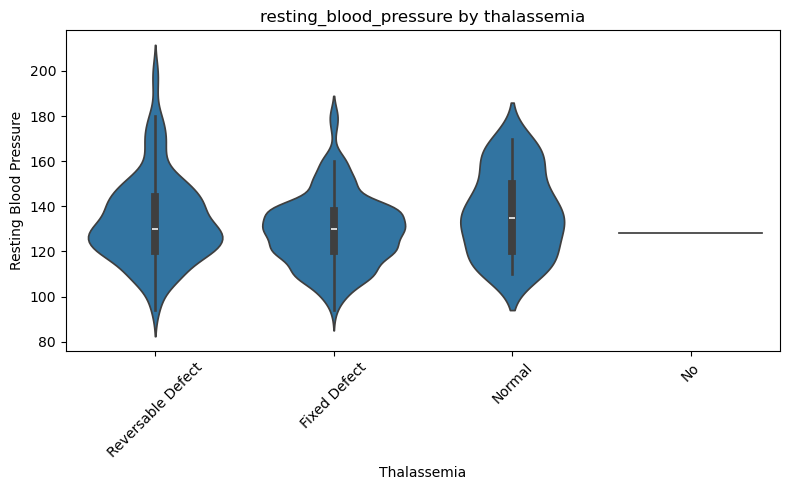

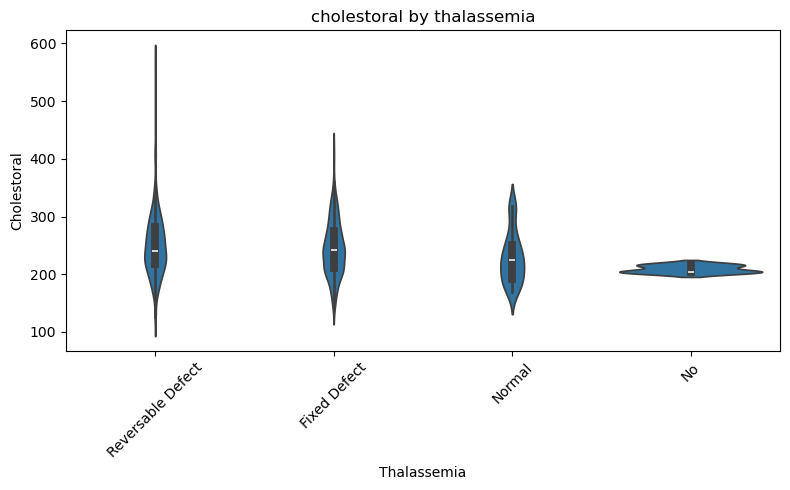

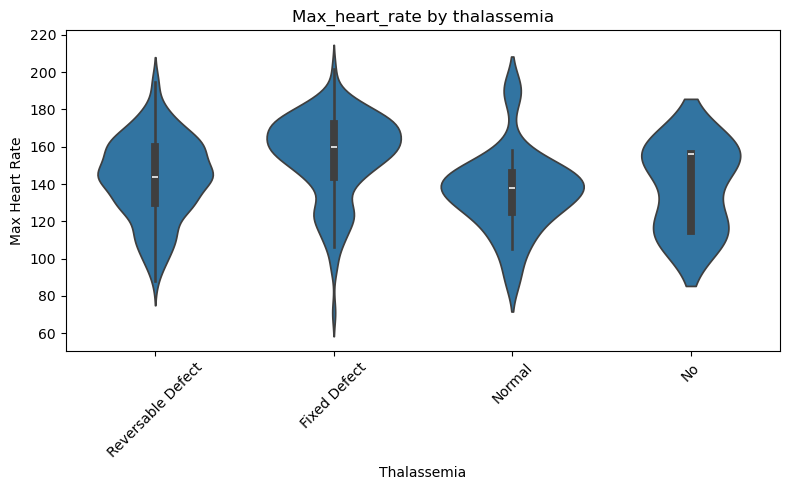

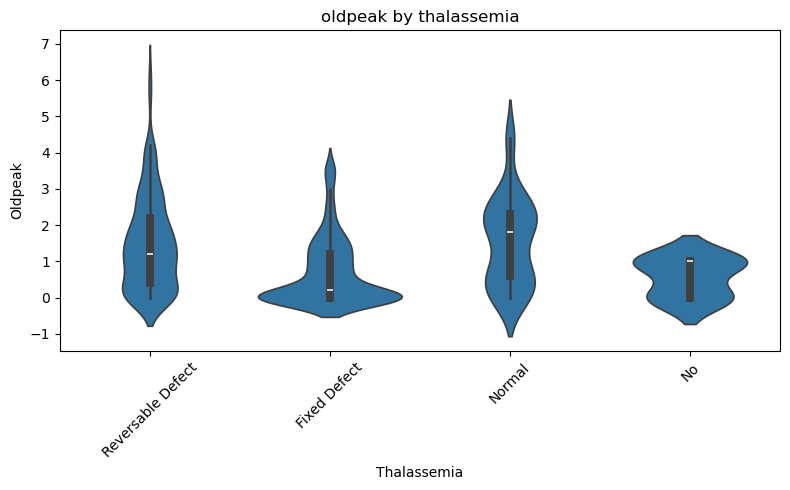

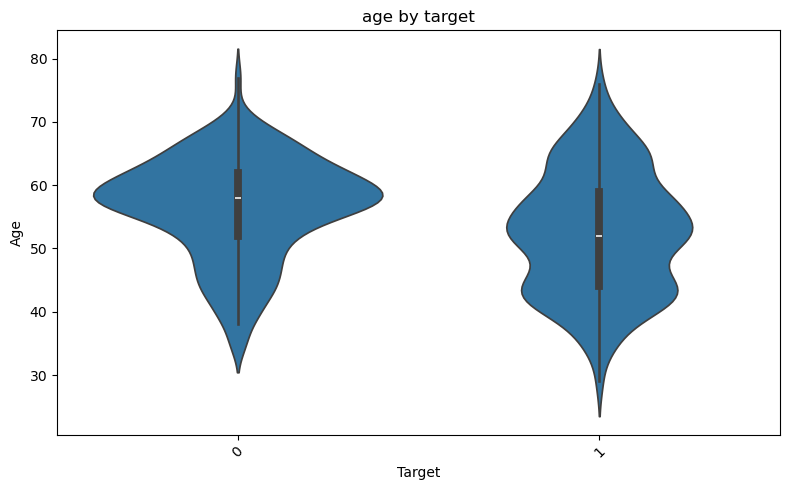

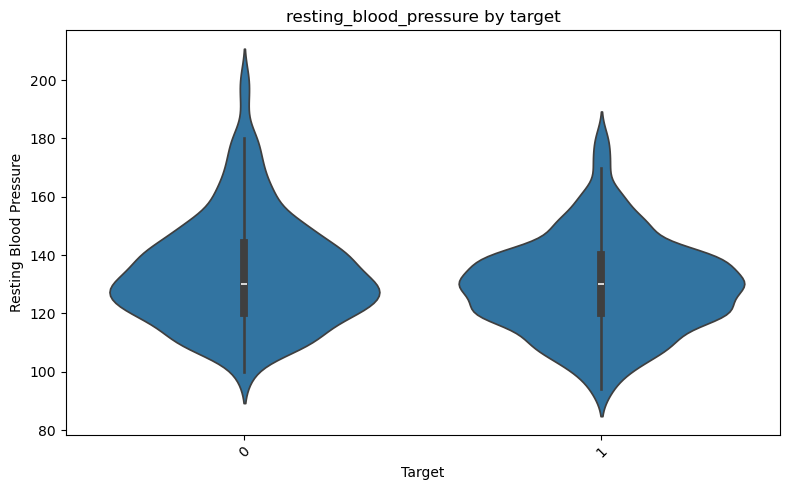

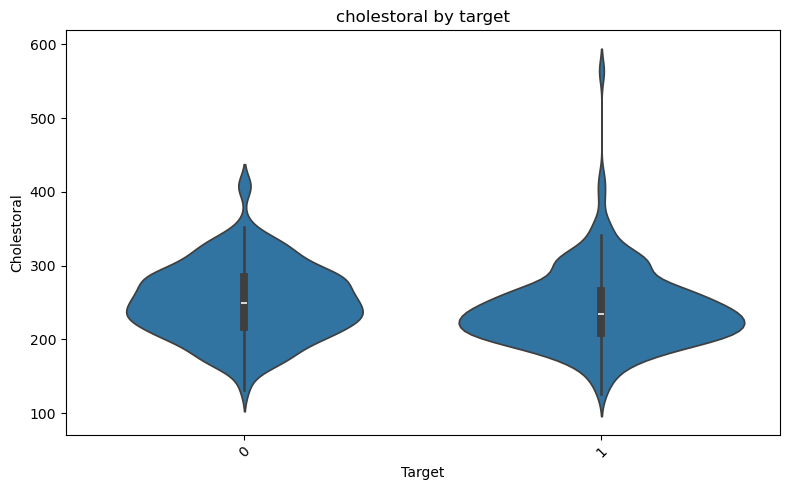

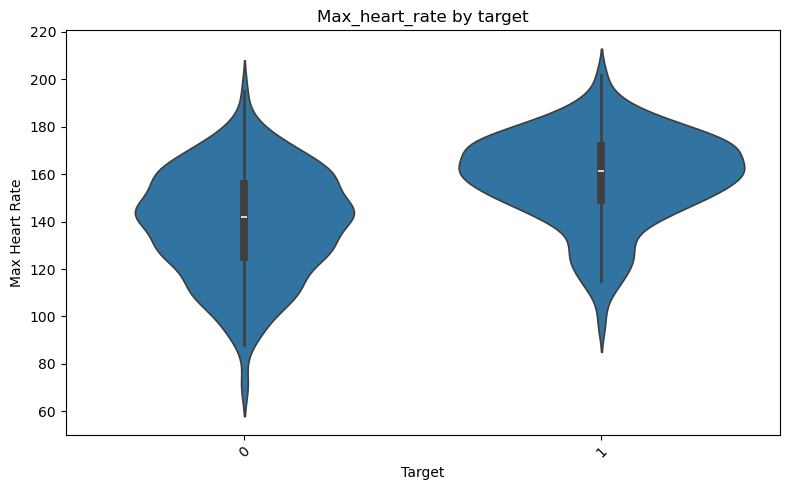

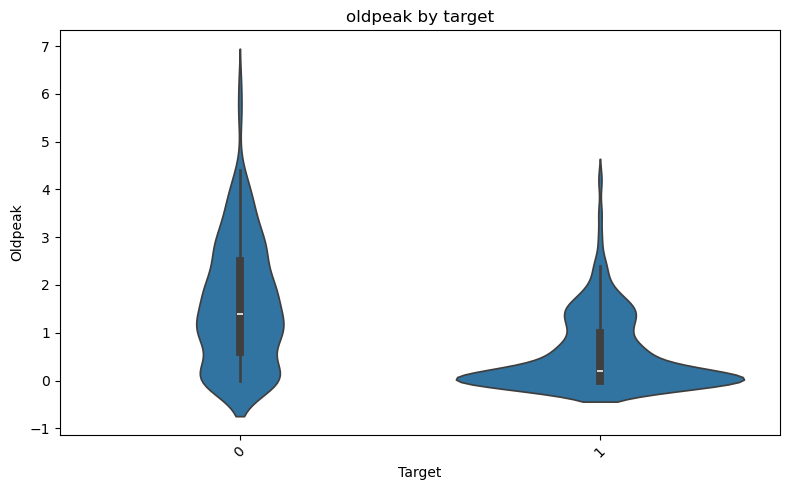

In [24]:
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,5))
        sns.violinplot(x=cat, y=num, data=heart)
        plt.title(f'{num} by {cat}')
        plt.xlabel(cat.replace('_', ' ').title())
        plt.ylabel(num.replace('_', ' ').title())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()